# 1.0 Importing libraries

### Note: the writeup is at the bottom of this notebook

In [127]:
import pandas as pd
import numpy as np
import chardet
import random

In [128]:
import missingno as msno

In [129]:
import pycaret

In [130]:
from pycaret.classification import *

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

In [132]:
from sklearn.preprocessing import LabelEncoder

In [133]:
from catboost import CatBoostClassifier, Pool

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
# Setting seeds
np.random.seed(132)
random.seed(132)

# 2.0 Importing Users file

In [136]:
path = '/Users/chinmayasukumar/Documents/Springboard/Springboard Projects/relax_challenge/takehome_users.csv'

# Using 'rb' to open file in binary mode to check encoding
with open(path, 'rb') as file:
    detector = chardet.detect(file.read())
    print(detector['encoding'])

ISO-8859-1


In [137]:
# Opening file in ISO-8859-1 encoding
users = pd.read_csv(path,
                    encoding='ISO-8859-1')

In [138]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [139]:
users.isna().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

In [140]:
users.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


In [141]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


<AxesSubplot:>

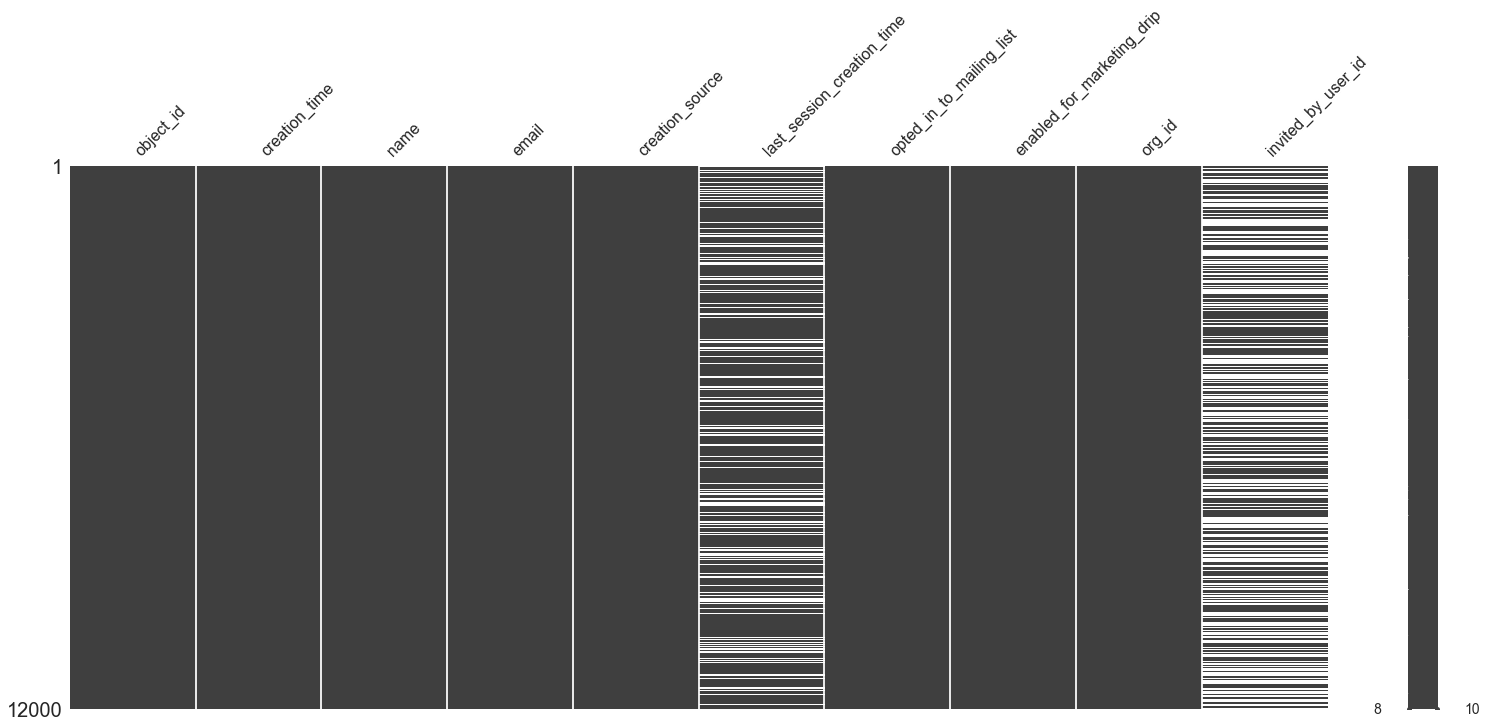

In [142]:
msno.matrix(users)

In [143]:
# A lot of data in invited_by_used_id and last_session_creation_time are missing, but evenly in the dataset

In [144]:
# NA observations from last_session_creation_time and invited_by_user_id will be deleted

In [147]:
users.dropna(inplace=True)

In [148]:
users.shape

(4776, 10)

In [149]:
# Renaming to make joining easier
users = users.rename(columns={'object_id':'user_id'})

In [18]:
users.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


# 3.0 Importing logs file

In [19]:
path = '/Users/chinmayasukumar/Documents/Springboard/Springboard Projects/relax_challenge/takehome_user_engagement.csv'

# Using 'rb' to open file in binary mode to check encoding
with open(path, 'rb') as file:
    detector = chardet.detect(file.read())
    print(detector['encoding'])

ascii


In [20]:
logs = pd.read_csv(path, encoding='ascii')

In [21]:
logs.head(4)

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1


In [22]:
logs.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


In [23]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


# 4.0 Merging DataFrames

In [150]:
# Setting time_stamp to datetime64
logs.time_stamp = logs.time_stamp.astype('datetime64')
logs.dtypes[0]

dtype('<M8[ns]')

In [151]:
# Viewing logs sorted by user_id and time
logs.sort_values(by=['user_id', 'time_stamp']).head(15)

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
5,2013-12-31 03:45:04,2,1
6,2014-01-08 03:45:04,2,1
7,2014-02-03 03:45:04,2,1
8,2014-02-08 03:45:04,2,1
9,2014-02-09 03:45:04,2,1


In [152]:
# Grouping by user_id
# Rolling over 7 days on time_stamp then counting visits
rolling = logs.groupby('user_id').rolling('7D', on='time_stamp')['visited'].count().reset_index()

In [153]:
# Isolate users with number of times visited > 7
adopted_users = rolling[rolling['visited'] >= 3.0]['user_id'].unique()

In [154]:
len(adopted_users)

1602

In [155]:
# Create DataFrame of adopted users
# 1 if the user is an adopted user
adopted_users_df = pd.DataFrame({'user_id':adopted_users,\
                            'adopted_user':1})

# Change user_id to int64
adopted_users_df.user_id = adopted_users_df.user_id.astype('int64')
adopted_users_df

,user_id,adopted_user
0,2,1
1,10,1
2,20,1
3,33,1
4,42,1
...,...,...
1597,11965,1
1598,11967,1
1599,11969,1
1600,11975,1


In [156]:
users.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [32]:
adopted_users_df.head()

,user_id,adopted_user
0,2,1
1,10,1
2,20,1
3,33,1
4,42,1


In [157]:
users.dtypes

user_id                         int64
creation_time                  object
name                           object
email                          object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
dtype: object

In [158]:
adopted_users_df.dtypes

user_id         int64
adopted_user    int64
dtype: object

In [159]:
# Merge adopted_users_df to users
users_df = users.merge(adopted_users_df, left_on='user_id', right_on='user_id', \
                        how='left')
users_df.head(10)

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,NaN
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,NaN
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,NaN
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,NaN
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,NaN
6,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,1.0
7,13,2014-03-30 16:19:38,Fry Alexander,AlexanderDFry@cuvox.de,ORG_INVITE,1.396196e+09,0,0,254,11204.0,NaN
8,17,2014-04-09 14:39:38,Reynolds Anthony,AnthonyReynolds@jourrapide.com,GUEST_INVITE,1.397314e+09,1,0,175,1600.0,NaN
9,22,2014-02-10 06:00:46,Myers Jordan,JordanMyers@gmail.com,ORG_INVITE,1.392012e+09,0,0,7,2994.0,NaN


In [160]:
# Fill Nan with 0's if user is not an adopted user
# Can't risk losing half of the dataset if all the Nan in invited_by_user_id were to be removed
# Nan will be repaced by 0's

users_df['adopted_user'] = users_df[ 'adopted_user'].fillna(0)

In [161]:
users_df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0


<AxesSubplot:>

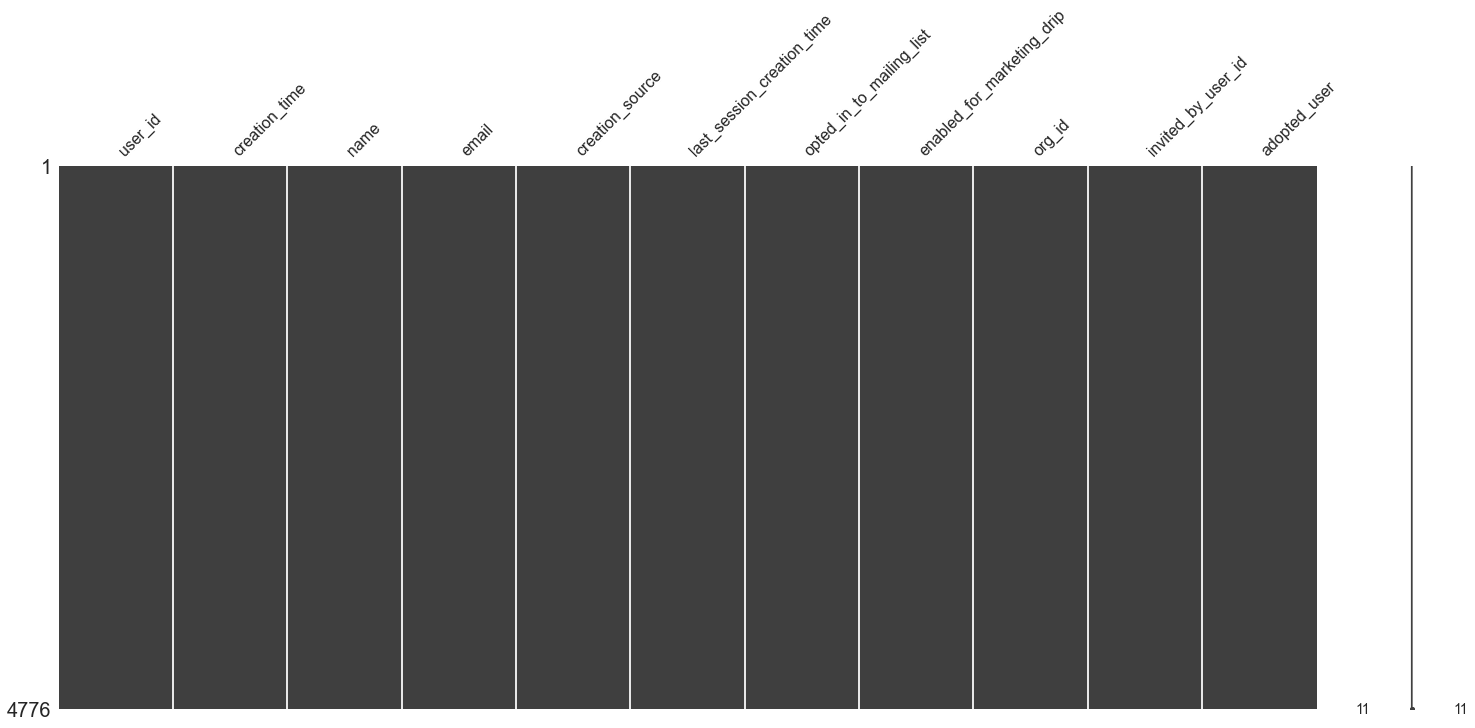

In [162]:
msno.matrix(users_df)

In [163]:
users_df.isna().sum()

user_id                       0
creation_time                 0
name                          0
email                         0
creation_source               0
last_session_creation_time    0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
invited_by_user_id            0
adopted_user                  0
dtype: int64

In [164]:
# Converting last_session_creation_time from unix (seconds) to date
users_df.last_session_creation_time = pd.to_datetime(users_df.last_session_creation_time, unit='s')

In [165]:
# Splitting domain name from email address
users_df['email'] = users_df['email'].str.split('@').str[1].str.split('.').str[0]

In [166]:
# Changing user_id to int
cols = ['invited_by_user_id', 'adopted_user', 'user_id']

users_df[cols] = users_df[cols].astype('int64')

In [167]:
# Checking if last_session_creation_time is just a copy of creation_time
users_df['creation_time'] == users_df['last_session_creation_time']

0        True
1       False
2        True
3       False
4       False
        ...  
4771    False
4772     True
4773    False
4774     True
4775     True
Length: 4776, dtype: bool

In [168]:
# Name not useful since user_id exists
users_df.drop(columns=['name'], inplace=True)

## 4.1 Seperating dates

In [169]:
users_df['creation_time'] = pd.to_datetime(users_df.creation_time)

In [170]:
# Extracting months and years
# Day not useful and could skew results
users_df['creation_year'] = users_df['creation_time'].dt.year
users_df['creation_month'] = users_df['creation_time'].dt.month
users_df['creation_day_of_week'] = users_df['creation_time'].dt.dayofweek
users_df['creation_hour'] = users_df['creation_time'].dt.hour

In [171]:
# Doing the same for last_session_creation
users_df['last_sess_year'] = users_df['last_session_creation_time'].dt.year
users_df['last_sess_month'] = users_df['last_session_creation_time'].dt.month

users_df['last_sess_day_of_week'] = users_df['last_session_creation_time'].dt.dayofweek
users_df['last_sess_creation_hour'] = users_df['last_session_creation_time'].dt.hour

In [172]:
users_df.head(2)

,user_id,creation_time,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,creation_year,creation_month,creation_day_of_week,creation_hour,last_sess_year,last_sess_month,last_sess_day_of_week,last_sess_creation_hour
0,1,2014-04-22 03:53:30,yahoo,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803,0,2014,4,1,3,2014,4,1,3
1,2,2013-11-15 03:45:04,gustr,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316,1,2013,11,4,3,2014,3,0,3


In [48]:
users_df.shape

(12000, 18)

In [49]:
users_df.adopted_user.isna().sum()

0

# 5.0 Modelling

In [173]:
# Creating X and y
X_cols = ['email', 'creation_source', 'opted_in_to_mailing_list', \
          'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id', \
         'creation_year', 'creation_month', 'creation_day_of_week', 
          'creation_hour', 'last_sess_year', 'last_sess_month',
          'last_sess_day_of_week', 'last_sess_creation_hour']

X = users_df[X_cols].to_numpy()

y = users_df['adopted_user'].to_numpy()

In [174]:
# Splitting data
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.3, random_state=132)

In [175]:
# Splitting to test and validation
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=132)

In [176]:
# Checking shape
[arr.shape for arr in [X_train, y_train, X_test, y_test]]

[(3343, 14), (3343,), (716, 14), (716,)]

In [177]:
# Viewing one observation
X_test[0,:]

array(['gustr', 'ORG_INVITE', 0, 0, 355, 9804, 2012, 11, 2, 9, 2012, 11,
       4, 9], dtype=object)

In [178]:
X.shape, y.shape

((4776, 14), (4776,))

## 5.1 CatBoostRegressor

In [179]:
# Columns that consist categorical info (email, creation_source)
feature_ind = [0,1]

In [180]:
# Features that are categorical are flagged using feature_ind from above
# Train, validation and test pool created
train_pool = Pool(X_train, y_train, cat_features=feature_ind)
val_pool = Pool(X_val, y_val, cat_features = feature_ind)
test_pool = Pool(X_test, y_test, cat_features=feature_ind)

In [181]:
# Initiating classifier
cat = CatBoostClassifier()

In [182]:
cat.fit(train_pool, eval_set=val_pool);

Learning rate set to 0.042694
0:	learn: 0.6478549	test: 0.6469273	best: 0.6469273 (0)	total: 9.25ms	remaining: 9.24s
1:	learn: 0.5862904	test: 0.5849446	best: 0.5849446 (1)	total: 14.8ms	remaining: 7.37s
2:	learn: 0.5405339	test: 0.5393453	best: 0.5393453 (2)	total: 20.7ms	remaining: 6.88s
3:	learn: 0.5101319	test: 0.5083049	best: 0.5083049 (3)	total: 24.8ms	remaining: 6.18s
4:	learn: 0.4625397	test: 0.4614998	best: 0.4614998 (4)	total: 30.6ms	remaining: 6.09s
5:	learn: 0.4240522	test: 0.4232163	best: 0.4232163 (5)	total: 35ms	remaining: 5.79s
6:	learn: 0.4038208	test: 0.4025643	best: 0.4025643 (6)	total: 40.6ms	remaining: 5.76s
7:	learn: 0.3759158	test: 0.3748846	best: 0.3748846 (7)	total: 46.1ms	remaining: 5.72s
8:	learn: 0.3538734	test: 0.3525202	best: 0.3525202 (8)	total: 52ms	remaining: 5.72s
9:	learn: 0.3320492	test: 0.3305024	best: 0.3305024 (9)	total: 57.6ms	remaining: 5.7s
10:	learn: 0.3207455	test: 0.3185287	best: 0.3185287 (10)	total: 61.4ms	remaining: 5.52s
11:	learn: 0.302

106:	learn: 0.0953778	test: 0.1159369	best: 0.1158949 (105)	total: 1.42s	remaining: 11.8s
107:	learn: 0.0950714	test: 0.1157828	best: 0.1157828 (107)	total: 1.43s	remaining: 11.8s
108:	learn: 0.0947757	test: 0.1154239	best: 0.1154239 (108)	total: 1.45s	remaining: 11.9s
109:	learn: 0.0944750	test: 0.1154245	best: 0.1154239 (108)	total: 1.49s	remaining: 12s
110:	learn: 0.0941488	test: 0.1154715	best: 0.1154239 (108)	total: 1.53s	remaining: 12.2s
111:	learn: 0.0940792	test: 0.1154204	best: 0.1154204 (111)	total: 1.55s	remaining: 12.3s
112:	learn: 0.0936596	test: 0.1155247	best: 0.1154204 (111)	total: 1.56s	remaining: 12.3s
113:	learn: 0.0931583	test: 0.1152427	best: 0.1152427 (113)	total: 1.57s	remaining: 12.2s
114:	learn: 0.0926201	test: 0.1149781	best: 0.1149781 (114)	total: 1.59s	remaining: 12.3s
115:	learn: 0.0922567	test: 0.1149763	best: 0.1149763 (115)	total: 1.6s	remaining: 12.2s
116:	learn: 0.0921992	test: 0.1149992	best: 0.1149763 (115)	total: 1.62s	remaining: 12.2s
117:	learn: 0

199:	learn: 0.0716433	test: 0.1098424	best: 0.1096225 (195)	total: 2.73s	remaining: 10.9s
200:	learn: 0.0713575	test: 0.1096512	best: 0.1096225 (195)	total: 2.74s	remaining: 10.9s
201:	learn: 0.0711969	test: 0.1095832	best: 0.1095832 (201)	total: 2.76s	remaining: 10.9s
202:	learn: 0.0708965	test: 0.1097254	best: 0.1095832 (201)	total: 2.78s	remaining: 10.9s
203:	learn: 0.0705916	test: 0.1096365	best: 0.1095832 (201)	total: 2.79s	remaining: 10.9s
204:	learn: 0.0703628	test: 0.1096381	best: 0.1095832 (201)	total: 2.79s	remaining: 10.8s
205:	learn: 0.0703126	test: 0.1096478	best: 0.1095832 (201)	total: 2.8s	remaining: 10.8s
206:	learn: 0.0700432	test: 0.1096539	best: 0.1095832 (201)	total: 2.81s	remaining: 10.8s
207:	learn: 0.0698173	test: 0.1095581	best: 0.1095581 (207)	total: 2.81s	remaining: 10.7s
208:	learn: 0.0696514	test: 0.1094701	best: 0.1094701 (208)	total: 2.83s	remaining: 10.7s
209:	learn: 0.0692576	test: 0.1094840	best: 0.1094701 (208)	total: 2.84s	remaining: 10.7s
210:	learn:

292:	learn: 0.0571629	test: 0.1076585	best: 0.1074117 (275)	total: 4.17s	remaining: 10.1s
293:	learn: 0.0570892	test: 0.1076379	best: 0.1074117 (275)	total: 4.2s	remaining: 10.1s
294:	learn: 0.0569162	test: 0.1076288	best: 0.1074117 (275)	total: 4.21s	remaining: 10.1s
295:	learn: 0.0567337	test: 0.1076576	best: 0.1074117 (275)	total: 4.22s	remaining: 10s
296:	learn: 0.0565567	test: 0.1077297	best: 0.1074117 (275)	total: 4.23s	remaining: 10s
297:	learn: 0.0564874	test: 0.1078335	best: 0.1074117 (275)	total: 4.25s	remaining: 10s
298:	learn: 0.0563723	test: 0.1080409	best: 0.1074117 (275)	total: 4.26s	remaining: 10s
299:	learn: 0.0562471	test: 0.1079712	best: 0.1074117 (275)	total: 4.29s	remaining: 10s
300:	learn: 0.0561084	test: 0.1079882	best: 0.1074117 (275)	total: 4.29s	remaining: 9.97s
301:	learn: 0.0560113	test: 0.1080045	best: 0.1074117 (275)	total: 4.3s	remaining: 9.94s
302:	learn: 0.0559281	test: 0.1080094	best: 0.1074117 (275)	total: 4.31s	remaining: 9.91s
303:	learn: 0.0557283	

393:	learn: 0.0455304	test: 0.1094822	best: 0.1074117 (275)	total: 5.32s	remaining: 8.18s
394:	learn: 0.0454150	test: 0.1096184	best: 0.1074117 (275)	total: 5.33s	remaining: 8.16s
395:	learn: 0.0453352	test: 0.1097051	best: 0.1074117 (275)	total: 5.34s	remaining: 8.15s
396:	learn: 0.0452380	test: 0.1097432	best: 0.1074117 (275)	total: 5.39s	remaining: 8.19s
397:	learn: 0.0452214	test: 0.1098156	best: 0.1074117 (275)	total: 5.41s	remaining: 8.19s
398:	learn: 0.0449955	test: 0.1097643	best: 0.1074117 (275)	total: 5.42s	remaining: 8.17s
399:	learn: 0.0449403	test: 0.1097434	best: 0.1074117 (275)	total: 5.43s	remaining: 8.15s
400:	learn: 0.0448604	test: 0.1096489	best: 0.1074117 (275)	total: 5.45s	remaining: 8.14s
401:	learn: 0.0448481	test: 0.1096737	best: 0.1074117 (275)	total: 5.45s	remaining: 8.11s
402:	learn: 0.0448223	test: 0.1097093	best: 0.1074117 (275)	total: 5.46s	remaining: 8.09s
403:	learn: 0.0447255	test: 0.1096560	best: 0.1074117 (275)	total: 5.48s	remaining: 8.08s
404:	learn

493:	learn: 0.0371953	test: 0.1114754	best: 0.1074117 (275)	total: 6.49s	remaining: 6.65s
494:	learn: 0.0371852	test: 0.1115601	best: 0.1074117 (275)	total: 6.51s	remaining: 6.64s
495:	learn: 0.0371607	test: 0.1115099	best: 0.1074117 (275)	total: 6.52s	remaining: 6.62s
496:	learn: 0.0371113	test: 0.1114692	best: 0.1074117 (275)	total: 6.53s	remaining: 6.61s
497:	learn: 0.0370635	test: 0.1114448	best: 0.1074117 (275)	total: 6.55s	remaining: 6.6s
498:	learn: 0.0370116	test: 0.1114058	best: 0.1074117 (275)	total: 6.56s	remaining: 6.59s
499:	learn: 0.0369861	test: 0.1114407	best: 0.1074117 (275)	total: 6.57s	remaining: 6.57s
500:	learn: 0.0369047	test: 0.1114898	best: 0.1074117 (275)	total: 6.58s	remaining: 6.55s
501:	learn: 0.0368460	test: 0.1115374	best: 0.1074117 (275)	total: 6.58s	remaining: 6.53s
502:	learn: 0.0368198	test: 0.1115597	best: 0.1074117 (275)	total: 6.59s	remaining: 6.51s
503:	learn: 0.0367516	test: 0.1115313	best: 0.1074117 (275)	total: 6.6s	remaining: 6.5s
504:	learn: 0

594:	learn: 0.0298753	test: 0.1135388	best: 0.1074117 (275)	total: 7.24s	remaining: 4.93s
595:	learn: 0.0297591	test: 0.1137145	best: 0.1074117 (275)	total: 7.29s	remaining: 4.94s
596:	learn: 0.0296469	test: 0.1138813	best: 0.1074117 (275)	total: 7.29s	remaining: 4.92s
597:	learn: 0.0295907	test: 0.1137467	best: 0.1074117 (275)	total: 7.3s	remaining: 4.9s
598:	learn: 0.0295575	test: 0.1137388	best: 0.1074117 (275)	total: 7.3s	remaining: 4.89s
599:	learn: 0.0295355	test: 0.1137414	best: 0.1074117 (275)	total: 7.31s	remaining: 4.87s
600:	learn: 0.0294976	test: 0.1138001	best: 0.1074117 (275)	total: 7.32s	remaining: 4.86s
601:	learn: 0.0294444	test: 0.1137979	best: 0.1074117 (275)	total: 7.32s	remaining: 4.84s
602:	learn: 0.0293895	test: 0.1137710	best: 0.1074117 (275)	total: 7.33s	remaining: 4.82s
603:	learn: 0.0292878	test: 0.1137456	best: 0.1074117 (275)	total: 7.34s	remaining: 4.81s
604:	learn: 0.0292588	test: 0.1137414	best: 0.1074117 (275)	total: 7.34s	remaining: 4.79s
605:	learn: 0

698:	learn: 0.0239788	test: 0.1162281	best: 0.1074117 (275)	total: 9.12s	remaining: 3.93s
699:	learn: 0.0239433	test: 0.1162134	best: 0.1074117 (275)	total: 9.14s	remaining: 3.92s
700:	learn: 0.0239364	test: 0.1162468	best: 0.1074117 (275)	total: 9.15s	remaining: 3.9s
701:	learn: 0.0238870	test: 0.1161902	best: 0.1074117 (275)	total: 9.16s	remaining: 3.89s
702:	learn: 0.0237911	test: 0.1162783	best: 0.1074117 (275)	total: 9.17s	remaining: 3.87s
703:	learn: 0.0237628	test: 0.1162809	best: 0.1074117 (275)	total: 9.2s	remaining: 3.87s
704:	learn: 0.0237417	test: 0.1163167	best: 0.1074117 (275)	total: 9.23s	remaining: 3.86s
705:	learn: 0.0237100	test: 0.1162237	best: 0.1074117 (275)	total: 9.24s	remaining: 3.85s
706:	learn: 0.0236010	test: 0.1163249	best: 0.1074117 (275)	total: 9.24s	remaining: 3.83s
707:	learn: 0.0235843	test: 0.1163730	best: 0.1074117 (275)	total: 9.26s	remaining: 3.82s
708:	learn: 0.0235257	test: 0.1164738	best: 0.1074117 (275)	total: 9.27s	remaining: 3.8s
709:	learn: 0

802:	learn: 0.0197992	test: 0.1198154	best: 0.1074117 (275)	total: 10.3s	remaining: 2.52s
803:	learn: 0.0197622	test: 0.1198129	best: 0.1074117 (275)	total: 10.3s	remaining: 2.51s
804:	learn: 0.0197162	test: 0.1198891	best: 0.1074117 (275)	total: 10.3s	remaining: 2.49s
805:	learn: 0.0196511	test: 0.1199102	best: 0.1074117 (275)	total: 10.3s	remaining: 2.48s
806:	learn: 0.0196157	test: 0.1198597	best: 0.1074117 (275)	total: 10.3s	remaining: 2.47s
807:	learn: 0.0195668	test: 0.1198958	best: 0.1074117 (275)	total: 10.3s	remaining: 2.46s
808:	learn: 0.0195306	test: 0.1198946	best: 0.1074117 (275)	total: 10.3s	remaining: 2.44s
809:	learn: 0.0194942	test: 0.1198880	best: 0.1074117 (275)	total: 10.4s	remaining: 2.43s
810:	learn: 0.0194698	test: 0.1199923	best: 0.1074117 (275)	total: 10.4s	remaining: 2.42s
811:	learn: 0.0194433	test: 0.1199892	best: 0.1074117 (275)	total: 10.4s	remaining: 2.4s
812:	learn: 0.0194142	test: 0.1199775	best: 0.1074117 (275)	total: 10.4s	remaining: 2.39s
813:	learn:

911:	learn: 0.0164472	test: 0.1227921	best: 0.1074117 (275)	total: 11s	remaining: 1.06s
912:	learn: 0.0164244	test: 0.1228209	best: 0.1074117 (275)	total: 11s	remaining: 1.05s
913:	learn: 0.0163831	test: 0.1227890	best: 0.1074117 (275)	total: 11s	remaining: 1.04s
914:	learn: 0.0163437	test: 0.1229020	best: 0.1074117 (275)	total: 11s	remaining: 1.02s
915:	learn: 0.0163247	test: 0.1229027	best: 0.1074117 (275)	total: 11s	remaining: 1.01s
916:	learn: 0.0163015	test: 0.1228650	best: 0.1074117 (275)	total: 11.1s	remaining: 1s
917:	learn: 0.0162591	test: 0.1228555	best: 0.1074117 (275)	total: 11.1s	remaining: 988ms
918:	learn: 0.0162263	test: 0.1229380	best: 0.1074117 (275)	total: 11.1s	remaining: 975ms
919:	learn: 0.0162012	test: 0.1229536	best: 0.1074117 (275)	total: 11.1s	remaining: 962ms
920:	learn: 0.0161868	test: 0.1228965	best: 0.1074117 (275)	total: 11.1s	remaining: 949ms
921:	learn: 0.0161852	test: 0.1228803	best: 0.1074117 (275)	total: 11.1s	remaining: 937ms
922:	learn: 0.0161640	t

In [183]:
y_pred = cat.predict(X_test)

In [184]:
confusion_matrix(y_test, y_pred)

array([[582,  15],
       [ 12, 107]])

In [185]:
names = ['adopted_user', 'normal_user']
print(classification_report(y_test, y_pred, target_names=names))

              precision    recall  f1-score   support

adopted_user       0.98      0.97      0.98       597
 normal_user       0.88      0.90      0.89       119

    accuracy                           0.96       716
   macro avg       0.93      0.94      0.93       716
weighted avg       0.96      0.96      0.96       716



# 6.0 Visualizing

In [186]:
# Getting importances from classifier
importance = cat.get_feature_importance()

In [187]:
# Zipped to sort from highest to lowest importance
zipped = zip(importance, X_cols)

In [188]:
zipped = sorted(zipped)

In [189]:
labels, importance_ = list(), list()

for l,i in zipped:
    labels.append(i)
    importance_.append(l)

<BarContainer object of 14 artists>

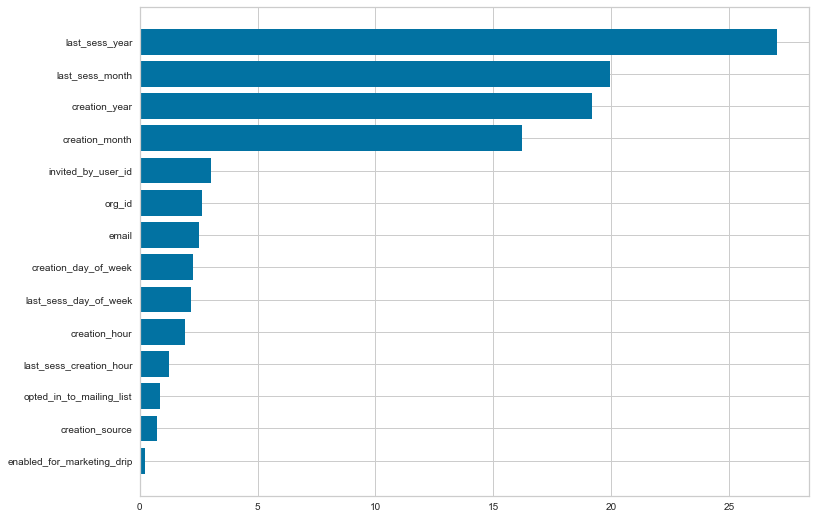

In [190]:
plt.figure(figsize=(12,9))
plt.barh(labels, importance_)

# 7.0 Analysis

In [191]:
adopted_users = users_df[users_df['adopted_user'] == 1]
normal_users = users_df[users_df['adopted_user'] == 0]

In [192]:
adopted_users.head(2)

,user_id,creation_time,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,creation_year,creation_month,creation_day_of_week,creation_hour,last_sess_year,last_sess_month,last_sess_day_of_week,last_sess_creation_hour
1,2,2013-11-15 03:45:04,gustr,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316,1,2013,11,4,3,2014,3,0,3
6,10,2013-01-16 22:08:03,gustr,ORG_INVITE,2014-06-03 22:08:03,1,1,318,4143,1,2013,1,2,22,2014,6,1,22


In [198]:
adopted_users.shape, normal_users.shape

((913, 18), (3863, 18))

## 7.1 Creation year

In [199]:
vals_adopted = adopted_users.creation_year.value_counts()
vals_adopted = vals_adopted.reset_index()
vals_adopted.columns = ['year', 'count']

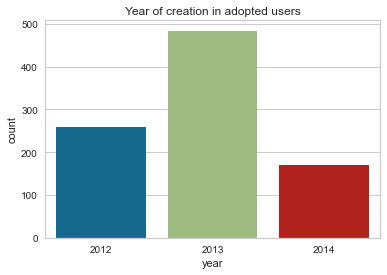

In [219]:
ax = sns.barplot(data=vals_adopted, x='year', y='count')
ax.set_title('Year of creation in adopted users');

In [201]:
vals_norm = normal_users.creation_year.value_counts()
vals_norm = vals_norm.reset_index()
vals_norm.columns = ['year', 'count']

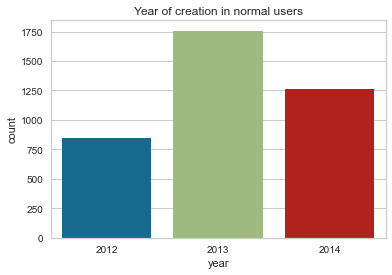

In [220]:
ax = sns.barplot(data=vals_norm, x='year', y='count')
ax.set_title('Year of creation in normal users');

## 7.2 Last session year

In [204]:
vals_adopted_sess = adopted_users.last_sess_year.astype('int').value_counts()
vals_adopted_sess = vals_adopted_sess.reset_index()
vals_adopted_sess.columns = ['year', 'count']

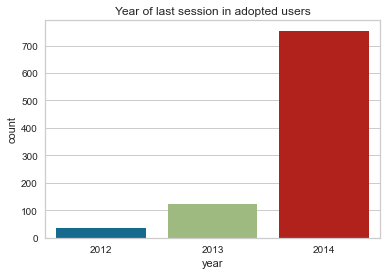

In [221]:
ax = sns.barplot(data=vals_adopted_sess, x='year', y='count')
ax.set_title('Year of last session in adopted users');

In [206]:
vals_norm_sess = normal_users.last_sess_year.astype('int').value_counts()
vals_norm_sess = vals_norm_sess.reset_index()
vals_norm_sess.columns = ['year', 'count']

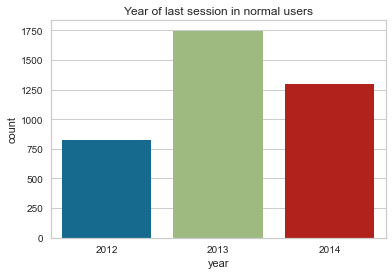

In [222]:
ax = sns.barplot(data=vals_norm_sess, x='year', y='count')
ax.set_title('Year of last session in normal users');

# 8.0 Discussion

## 8.1 Approach

The approach in this project was to build a model to predict whether a user would be adopted or not. This required the building of a classifier. Even though this is a binary classifcation problem, Logistic regressors don't fair well with categorical data. Therefore a CatBoostRegressor model was chosen since it works better with categorical data.

There were many missing values in the last_session_creation_time and invited_by_user_id. Observations with null values in these features were removed

## 8.2 Results

The model was quite accurate (f1 = 0.96) at predicting whether a user is an adopter. Feature importances were extracted from this model.

## 8.3 Analysis

The date of the last session and creation seem to play the biggest factor in determining whether a user is adopted. This should be a given since users who are given more recently active are more likely to use the product regularly. Users who signed up earlier (before 2014) tend to be adopted users. Invited by user and organization_id are also decent predictors for adoption